#Uber data analysis

Import The Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
df=pd.read_csv(r"C:\Users\Vani_\Desktop\Downloaded project files\Uber.csv")
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


Checcking for null values

In [3]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [4]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().any()

START_DATE*    False
END_DATE*      False
CATEGORY*      False
START*         False
STOP*          False
MILES*         False
PURPOSE*       False
dtype: bool

In [7]:
df.describe(include="all")

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
count,653,653,653,653,653,653.000000,653
unique,652,652,2,131,137,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,647,161,155,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,11.196325,NaN
std,NaN,NaN,NaN,NaN,NaN,22.986429,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.200000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.400000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


In [23]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

Convert dates into datetime datatype 

In [8]:
df["START_DATE*"]= pd.to_datetime(df["START_DATE*"],format="%m/%d/%Y %H:%M")
df["END_DATE*"]= pd.to_datetime(df["END_DATE*"],format="%m/%d/%Y %H:%M")

In [9]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [30]:
df1=df.copy()
df1['day'] = df['START_DATE*'].dt.strftime('%A')
df1['month'] = df['START_DATE*'].dt.strftime('%b')
df1['year'] = df['START_DATE*'].dt.year
df1['date'] = df['START_DATE*'].apply(lambda x: x.date())
df1

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,day,month,year,date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Jan,2016,2016-01-01
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Jan,2016,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Jan,2016,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Jan,2016,2016-01-06
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,Jan,2016,2016-01-06
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Saturday,Dec,2016,2016-12-31
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Saturday,Dec,2016,2016-12-31
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Saturday,Dec,2016,2016-12-31
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Saturday,Dec,2016,2016-12-31


In [42]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR']=hour
df['DAY']=day
df['DAY_OF_WEEK']=dayofweek
df['MONTH']=month
df['WEEKDAY']=weekday
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


Categories

In [44]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

Text(0.5, 1.0, 'CATEGORY v/s COUNT')

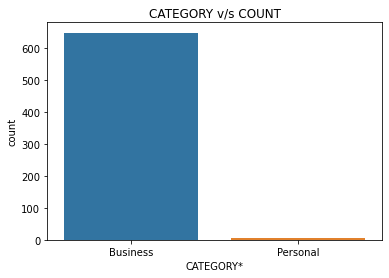

In [52]:
sns.countplot(x='CATEGORY*',data=df)
plt.title('CATEGORY v/s COUNT')

How many miles do people travel with Uber?

Text(0.5, 1.0, 'Miles travelled')

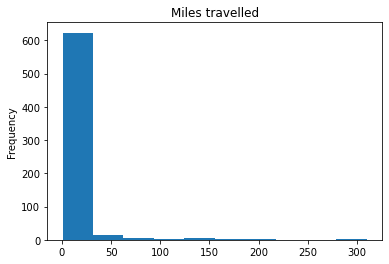

In [55]:
df['MILES*'].plot.hist()
plt.title('Miles travelled')

How long(duration) do people travel with Uber?

In [69]:
df['diff']= df['END_DATE*']-df['START_DATE*']
df['minutes'] = df['diff'].dt.total_seconds()/60
df['minutes']
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,diff,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,0 days 00:06:00,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,0 days 00:13:00,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0 days 00:14:00,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,0 days 01:07:00,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,0 days 00:04:00,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday,0 days 00:07:00,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday,0 days 00:18:00,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday,0 days 00:35:00,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday,0 days 00:18:00,18.0


Text(0.5, 1.0, 'Number of trips Vs minutes')

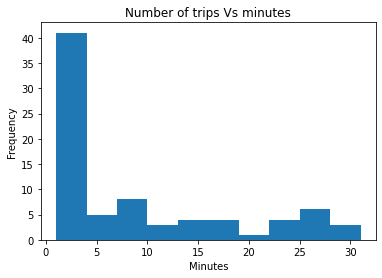

In [95]:
plt.hist(
    df['minutes'].value_counts())
plt.figsize=(10,5)
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Number of trips Vs minutes')

What Hour Do Most People Take Uber?

Text(0.5, 1.0, 'Number of trips Vs hours')

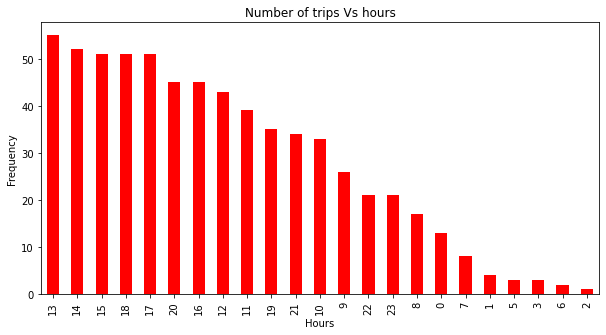

In [71]:
hours = df['START_DATE*'].dt.hour.value_counts()


hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

What is the purpose of their trips?

Text(0.5, 1.0, 'Number of trips Vs purpose')

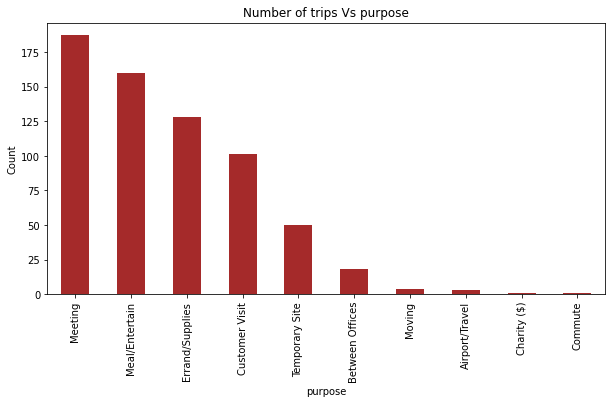

In [73]:
pur=df['PURPOSE*'].value_counts()
pur.plot(kind='bar',figsize=(10,5),color='brown')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.title('Number of trips Vs purpose')

Which Day Has The Highest Number Of Trips?

Text(0.5, 1.0, 'Number of trips Vs Days of week')

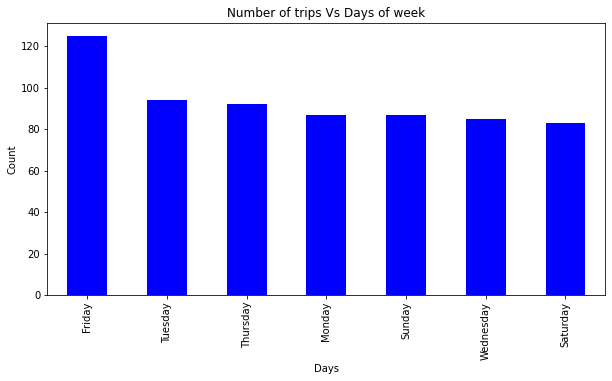

In [74]:
df['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Number of trips Vs Days of week')

Which Day of the month has The Highest Number Of Trips?

Text(0.5, 1.0, 'Number of trips Vs Date')

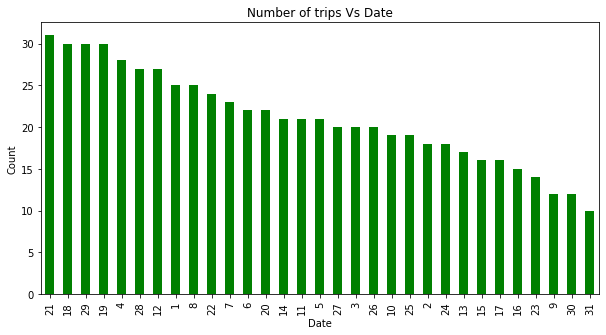

In [76]:
day=df['DAY'].value_counts()
day.plot(kind='bar',figsize=(10,5),color='green')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of trips Vs Date')

What Are The Trips In The Month?

Text(0.5, 1.0, 'Number of TRIPS Vs MONTH')

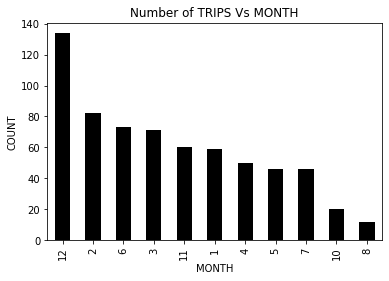

In [80]:
mon=df['MONTH'].value_counts()
mon.plot(kind='bar',color='black')

plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.title('Number of TRIPS Vs MONTH')

Where Do People Start Boarding Their Trip From Most?

Text(0.5, 1.0, 'Number of Trips Vs Start point')

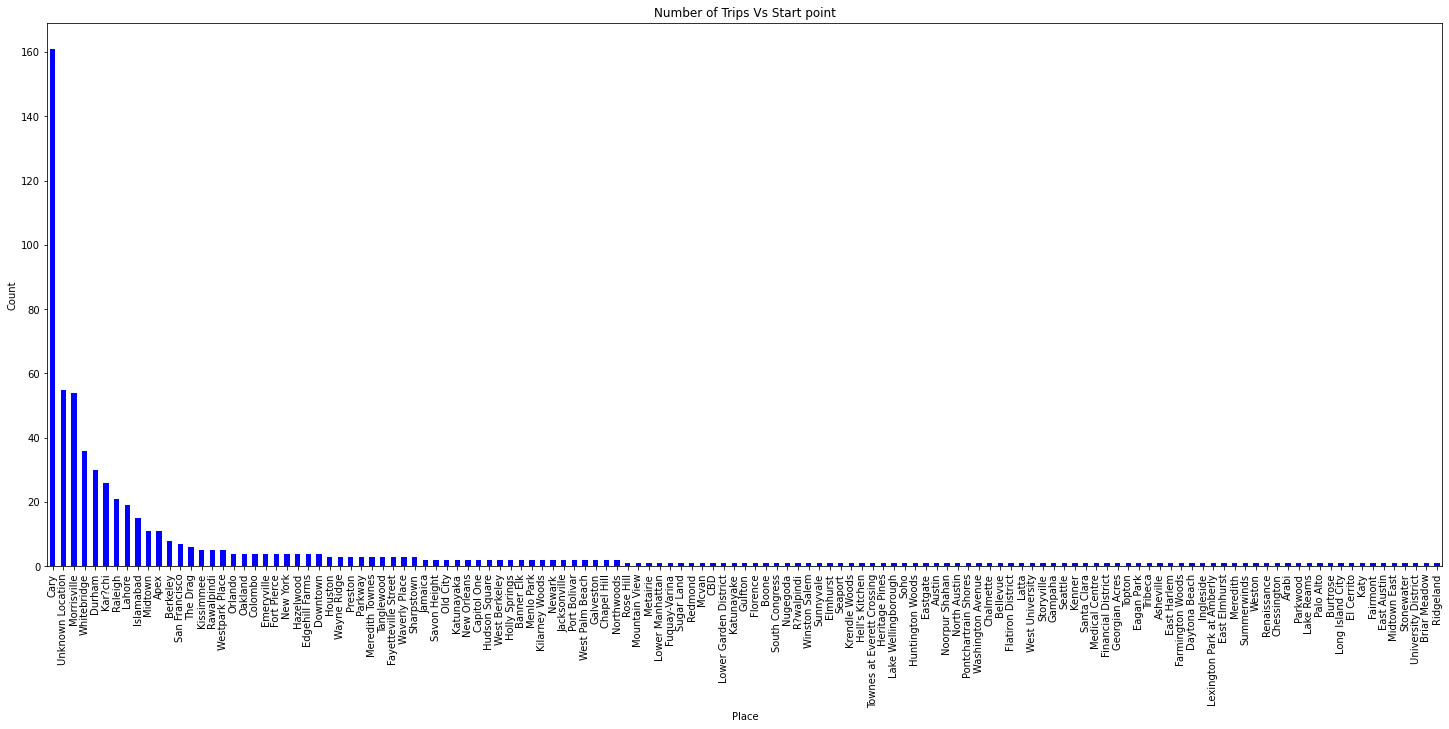

In [88]:
df['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of Trips Vs Start point')

Where Do People Get Down From Their Trip?

Text(0.5, 1.0, 'Number of Trips Vs Stop point')

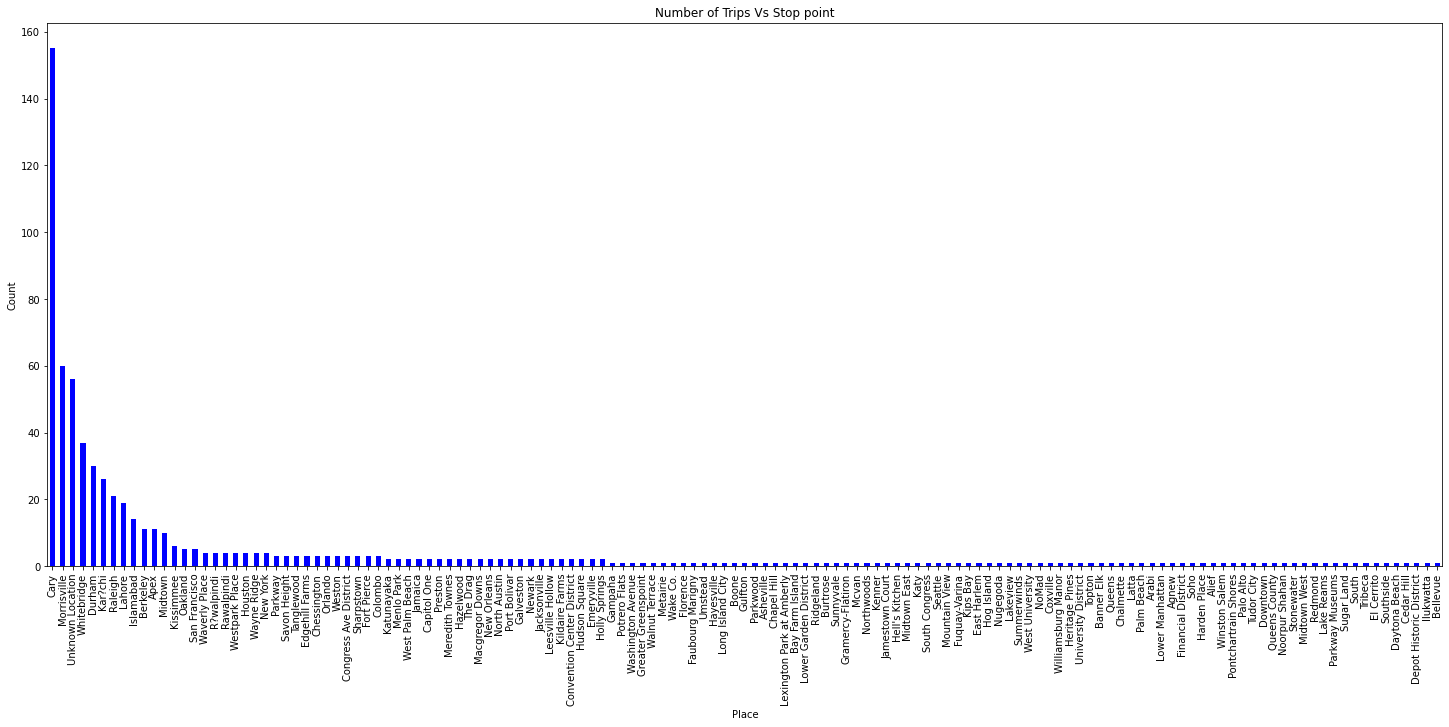

In [10]:
df['STOP*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of Trips Vs Stop point')